# Project: TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#packages">Import Packages</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 5000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

### What we can do ?
> We can exploare this dataset and asking some important questions that can be answered given this information 
 like..
> <ul> 
    <li>Which genres are most popular from year to year ?</li>
    <li>Which movie have high popularity over this years ?</li>
    <li>What kinds of properties are associated with movies that have high revenues ?</li>
    <li>Is there a relation between budget and revenue ?</li>
  </ul>

<a id='packages'></a>
## Import Packages

> In this section we will import necessary packages and vistualization packages to make the process enjoyable and give us valuable insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, We will load the data, check for cleanliness, and then trim and clean our dataset for analysis.

In [2]:
# Load our data and print out a few lines.
df = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

There is a lot if missing data in the coloumn "**homepage**" and "**tagline**" but dont worry we can drop this columns because we don't need it in analysis.
<br>also we can drop any columns or rows don't give us valuable information and fill the missing data that can use in analysis.

In [4]:
df.drop(['homepage','tagline','id'], axis = 1,inplace = True) 

In [5]:
df.shape

(4803, 17)

There is two missing data in runtime columns we can fill it by the avarage runtime

In [6]:
df['runtime'].fillna(df['runtime'].mean(),inplace=True)

Then drop the rest of rows with missing data

In [7]:
df.dropna(inplace = True)

Now we can make sure we have not any missing data

In [8]:
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [9]:
df.shape

(4799, 17)

Also we have not any duplicates 

In [10]:
df.duplicated().sum()

0

We can take a look at datarypes and edit it if needed 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   keywords              4799 non-null   object 
 3   original_language     4799 non-null   object 
 4   original_title        4799 non-null   object 
 5   overview              4799 non-null   object 
 6   popularity            4799 non-null   float64
 7   production_companies  4799 non-null   object 
 8   production_countries  4799 non-null   object 
 9   release_date          4799 non-null   object 
 10  revenue               4799 non-null   int64  
 11  runtime               4799 non-null   float64
 12  spoken_languages      4799 non-null   object 
 13  status                4799 non-null   object 
 14  title                 4799 non-null   object 
 15  vote_average         

We can add a new column "year" to make it easier while working with date

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4799, dtype: int64

Now we have a clean dataset we can work on to drive some questons and answer it freely <br> let's explore our data 

<a id='eda'></a>
## Exploratory Data Analysis

> Now let's try to exploare columns and variables and show some statistics
 


In [13]:
# exploare columns
df.head(1)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009


In [14]:
# showing some statistcs
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,year
count,4.799000e+03,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,21.509884,8.232920e+07,106.903105,6.094186,690.789123,2002.461138
std,4.073251e+07,31.824074,1.629076e+08,22.561305,1.188340,1234.941795,12.414480
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1916.000000
25%,8.000000e+05,4.685547,0.000000e+00,94.000000,5.600000,54.000000,1999.000000
50%,1.500000e+07,12.929525,1.918402e+07,103.000000,6.200000,236.000000,2005.000000
75%,4.000000e+07,28.350728,9.295652e+07,118.000000,6.800000,737.500000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2017.000000


from this slight statistics <br>
* I think there is a postive correlation between budget spend and revenue
* Also this is amazing to have at least one movie with high vote_average
* Its a little weird to have a movie with 0 run time

### How we can find Movies are most popular from all years or specific year or period time ?


In [15]:
def get_insights_popularity(year_1 = 0 , year_2 = 0) :
    # this function will give us the most popular genres 
    # Parameters :
    #    year_1 : int ( year between 1960 to 2016)
    #           if you not give any number the function will give you insights of all years
    #           if you give a specific year the function will give you insights of this years
    #    year_2 : int (year between year_1 to 2016)
    #            if you give a specific year the function will give you insights between year_1 and year_2
    sorted_popularity = df.sort_values(by = 'popularity',ascending= False)
    if year_2 == 0 :
        year_2 = year_1
    if year_1 != 0 :
        sorted_popularity.query('year >= @year_1 and year <= @year_2',inplace = True)
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(sorted_popularity['title'].head(10),sorted_popularity['popularity'].head(10))

## Which movie have high popularity over all years ?

if you not give the function any parameter the function will give you insights of all years

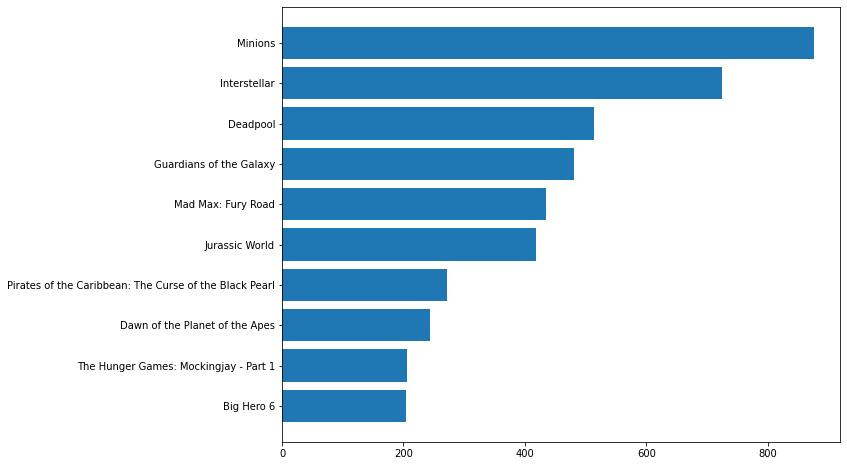

In [16]:
get_insights_popularity()

**Minions** movie have the most popularity all years

## Which movie have the most popularity in specific year or in period time ?

Here we can find which movie have the most popularity in specific year or for example between 2000 to 2015

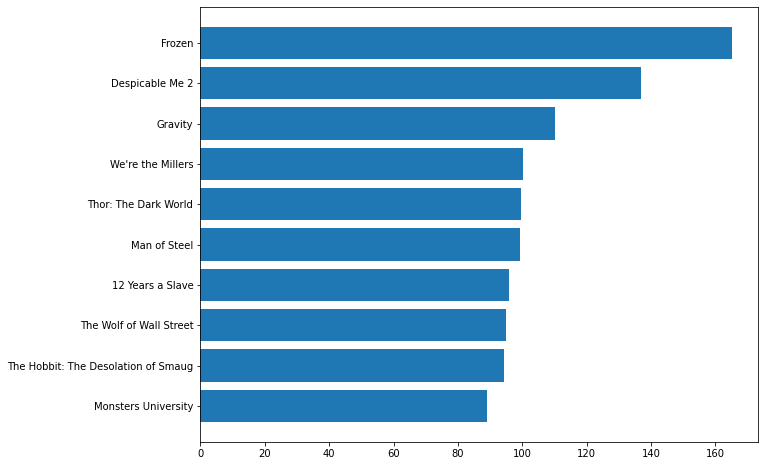

In [17]:
get_insights_popularity(2013)

the most popular movie in 2013 is **Frozen**

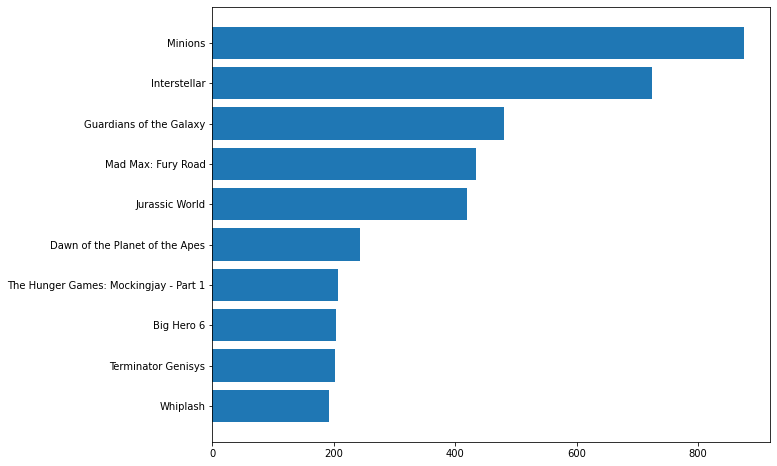

In [18]:
get_insights_popularity(2013,2015)

the most popular movie from 2013 to 2015 is **Minions**

### How we can find Genres are most popular from all years or specific year or period time ?

In [19]:
def get_insights_genres(year_1 = 0 , year_2 = 0) :
    # this function will give us the most popular genres 
    # Parameters :
    #    year_1 : int ( year between 1960 to 2016)
    #           if you not give any number the function will give you insights of all years
    #           if you give a specific year the function will give you insights of this years
    #    year_2 : int (year between year_1 to 2016)
    #            if you give a specific year the function will give you insights between year_1 and year_2
    
    sorted_popularity = df.sort_values(by = 'popularity',ascending= False)
    if year_2 == 0 :
        year_2 = year_1
    if year_1 != 0 :
        sorted_popularity.query('year >= @year_1 and year <= @year_2',inplace = True)
    z = list()
    print(sorted_popularity.shape)
    counter = 0
    for i in sorted_popularity['genres'] :
        i = json.loads(i)
        for dic in i :
            dict(dic)
        z.append(dic.get('name'))
        counter +=1
        if counter >=sorted_popularity['genres'].shape[0]/2 :
            break
    unique_genres = set(z)
    counts = dict()
    for i in z:
      counts[i] = counts.get(i, 0) + 1 
    plt.subplots(figsize=(10,8))
    plt.gca().invert_yaxis()
    plt.barh(list(counts.keys()),list(counts.values()))

## Which Genres have high popularity over all years ?

(4799, 18)


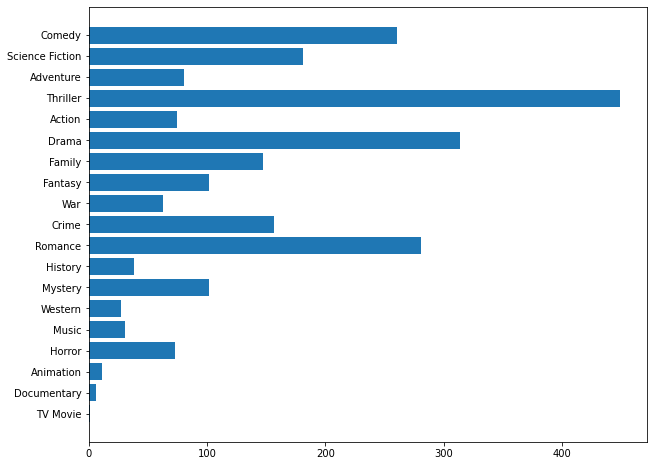

In [20]:
get_insights_genres()

## Which Genres have high popularity in specific year or period time ?

(227, 18)


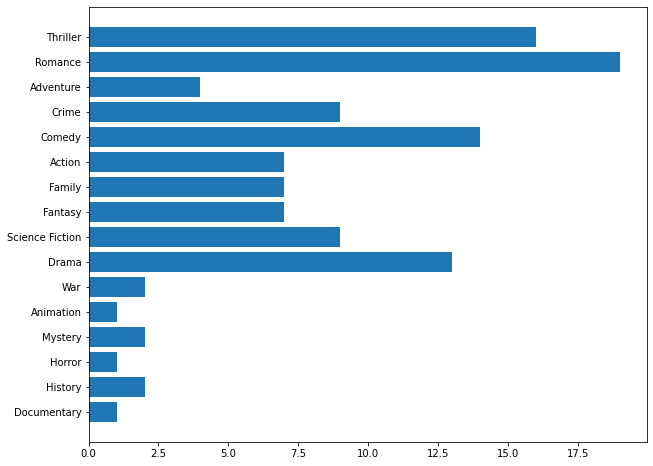

In [21]:
get_insights_genres(2008)

(656, 18)


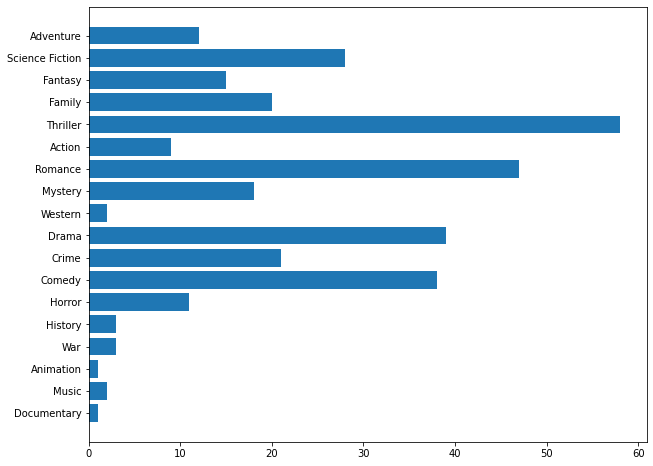

In [22]:
get_insights_genres(2010,2012)

### What kinds of properties are associated with movies that have high revenues ?<br> or Is there a relation between budget and revenue ?

In [23]:
def companies_make_moveis_with_high_revenues() :
    sorted_revenues = df.sort_values(by = 'revenue',ascending= False)
    low_revenues = df[df['revenue'] < df['revenue'].median()]
    high_revenues = df[df['revenue'] >= df['revenue'].median()]
    z = list()
    print(high_revenues.shape)
    counter = 0
    for i in high_revenues['production_companies'] :
        i = json.loads(i)
        for dic in i :
            dict(dic)
        z.append(dic.get('name'))
    unique_genres = set(z)
    counts = dict()
    for i in z:
      counts[i] = counts.get(i, 0) + 1 
    s = pd.DataFrame(list(counts.values()),list(counts.keys()),columns=['counts'])
    s= s.sort_values(by='counts',ascending= False)
    print(s)

In [24]:
companies_make_moveis_with_high_revenues()

(2400, 18)
                           counts
Warner Bros.                   91
Paramount Pictures             45
Touchstone Pictures            40
Metro-Goldwyn-Mayer (MGM)      38
Universal Pictures             32
...                           ...
Konrad Pictures                 1
Loofah Productions              1
Walwa Films S.A.                1
Manifest Film Company           1
Kathbur Pictures                1

[1319 rows x 1 columns]


In [25]:
low_revenues = df[df['revenue'] < df['revenue'].median()]
high_revenues = df[df['revenue'] >= df['revenue'].median()]
high_revenues['budget'].mean() , low_revenues['budget'].mean()

(49666335.08625, 8456944.27344727)

Now for sure the more budget the more revenues <br> Also Warner Bros company make a lot of revenues i think this is the best company

### Is there a relation between budget and revenue ?

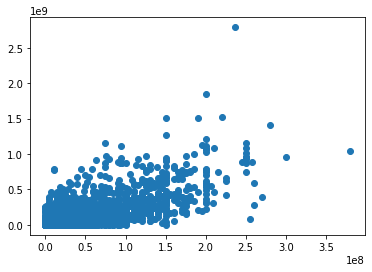

In [26]:
plt.scatter(df['budget'],df['revenue'])

there is a positive correlation between budget and revenue

<a id='conclusions'></a>
## Conclusions

> we analyzed this amazing dataset and find the best movies in each year and minions movie is the best movie in all years
> Also the popular genres is thriller , drama , romance 
> there is a poisitive correlation between budget and revenues
## Limitations

> we dropped some rows maybe will affect on insights bud dont worry this is only about 5 columns